<h2>Data Exploration</h2>
<p>An exporation of the data synthetic data that has been generated and merged</p>

In [2]:
import pandas as pd
#Load the CSV file
df = pd.read_csv('/Users/ImranBary/VITAI/combined_data.csv')

<h5>Total Patients in Data Set</h5>

In [3]:
df['Id'].count()

116842

<h5>Number of patinets who are deceased</h5>

In [4]:
deceased_count = df[df['DECEASED'] == 1]['DECEASED'].count()
deceased_count

16842

<h5>Percentage of Patients above 100 years old</h5>

In [7]:
patients_over_100 = ((df[df['AGE'] > 100]['AGE'].count())/df['AGE'].count())*100
patients_over_100

3.141849677342052

<h5>Patient with the most number of conditions</h5>

In [8]:
patient_most_conditon = df['num_conditions'].max()
patient_most_conditon

584

Note: you may need to restart the kernel to use updated packages.
First 5 rows of structured data:
                                     Id        AGE  DECEASED GENDER   RACE  \
0  e7fccb74-5441-cf7d-77e3-72e0ad240431  10.866530         0      M  white   
1  9ee1c020-c213-d4ff-6a0f-68c25cabfccd  17.100616         0      F  white   
2  5c7c82a3-2560-b590-afd6-05a563cc467a  24.260096         0      M  white   
3  dd5d2d27-99de-a39c-9110-e69e439982c9  40.818617         0      M  white   
4  5dee1b1d-1012-018c-2f44-7eb930a42b76  43.085558         0      F  white   

     ETHNICITY  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  INCOME  \
0  nonhispanic             31923.49               574.02  787269   
1  nonhispanic             47615.89                 0.00   60322   
2  nonhispanic              4559.06             52650.84   16070   
3     hispanic            129600.02             11690.43   77414   
4  nonhispanic            172547.56            100209.98   28406   

   num_conditions  ... 

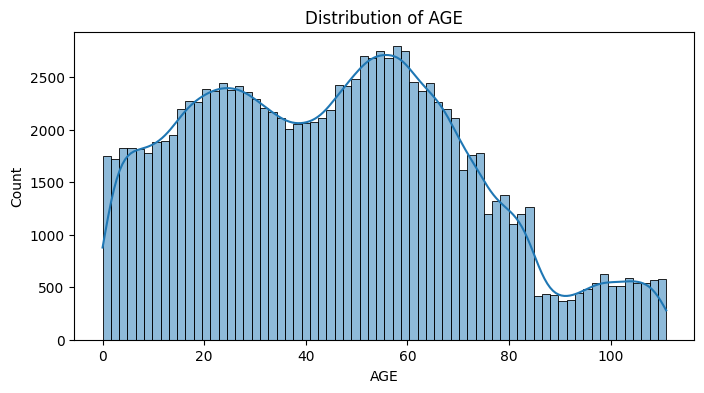

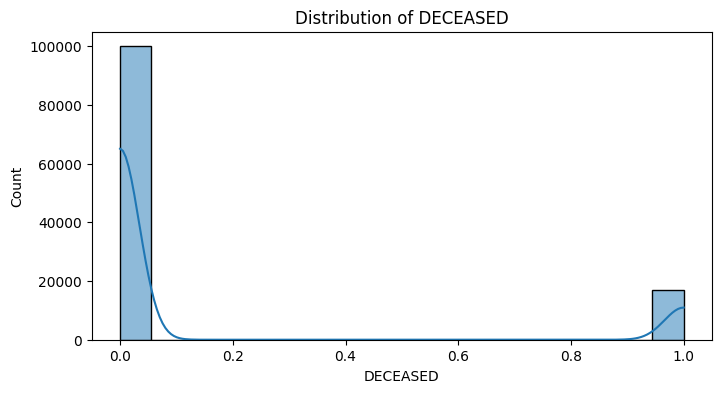

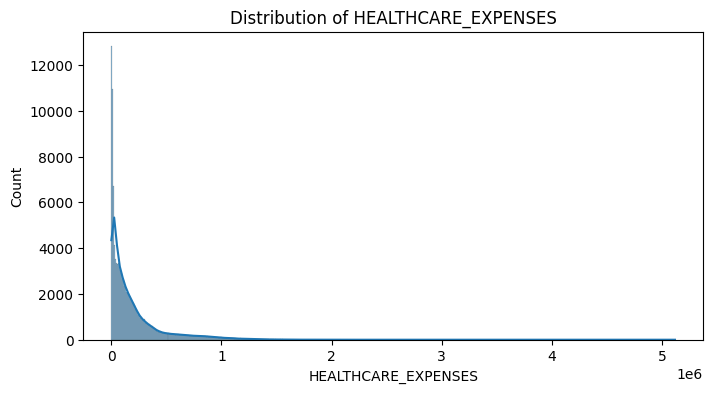

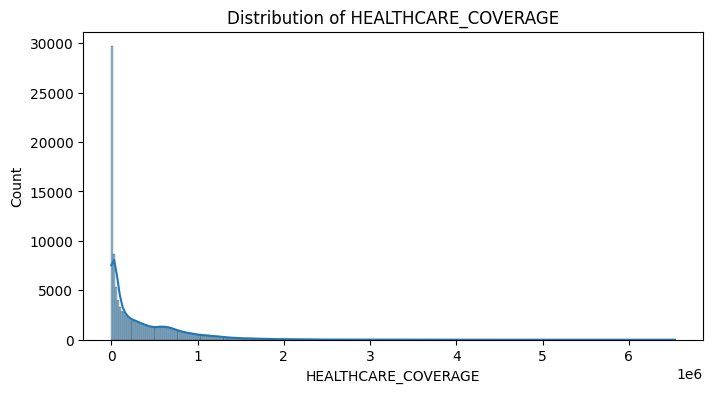

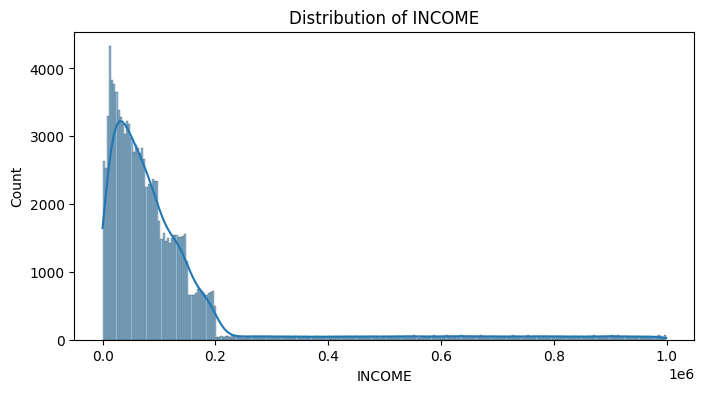

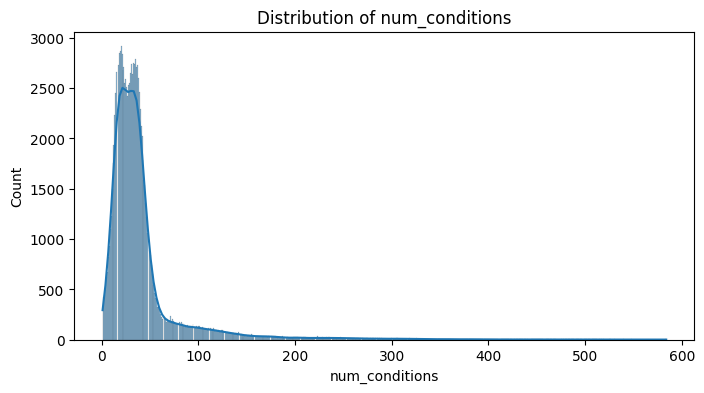

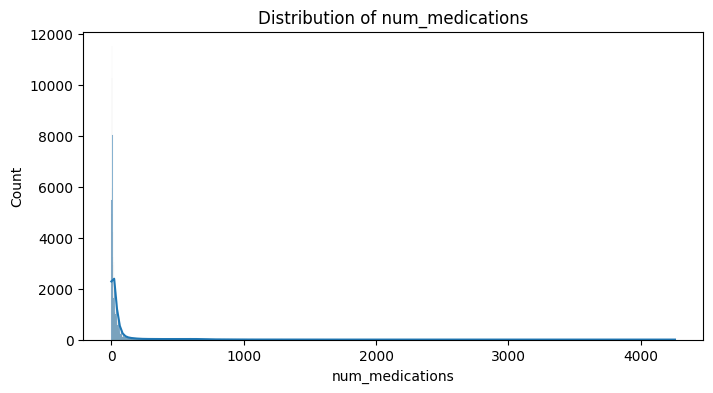

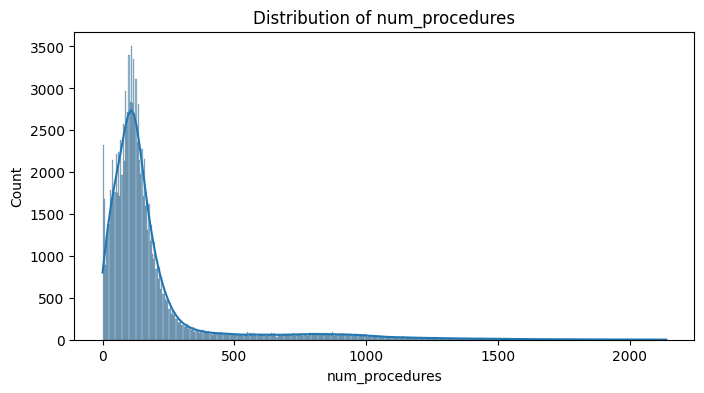

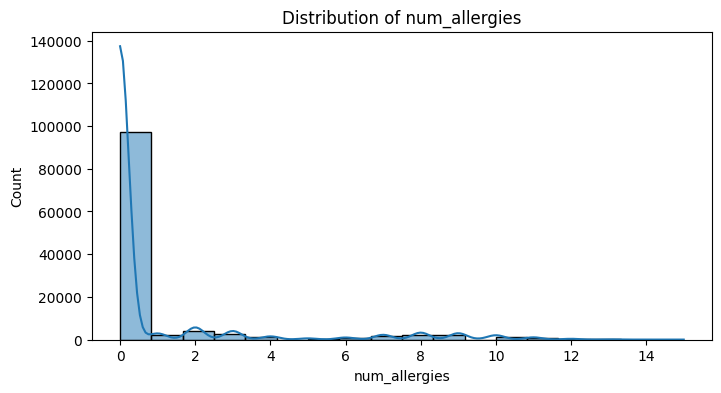

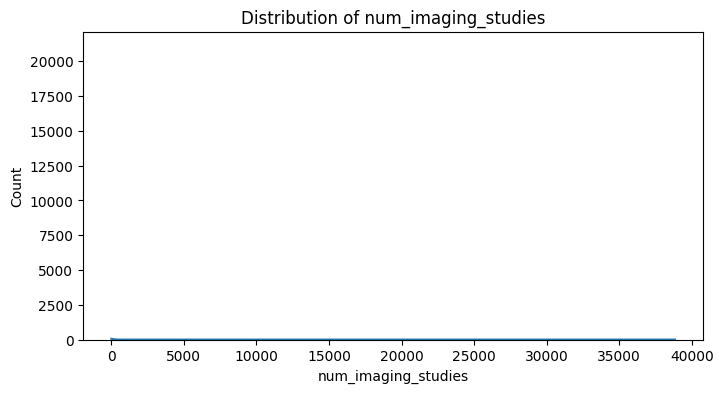

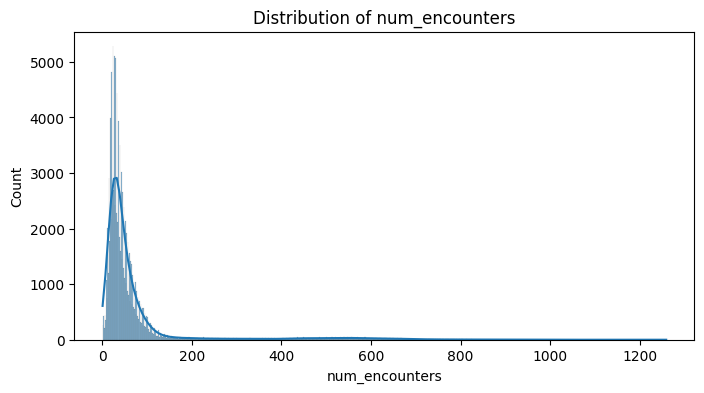

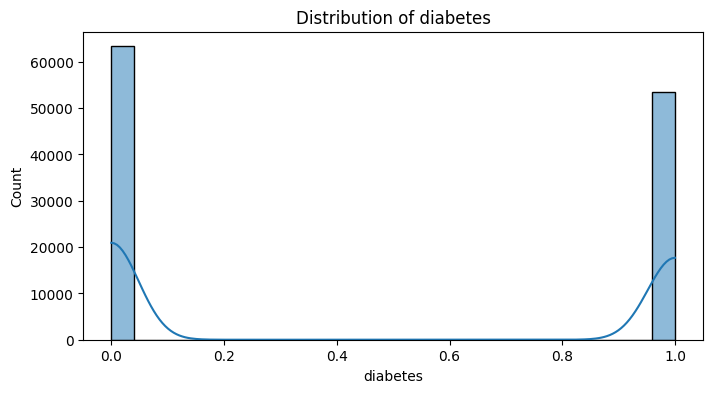

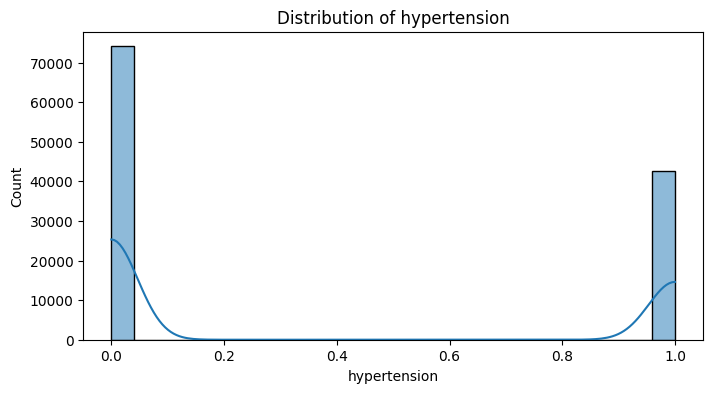

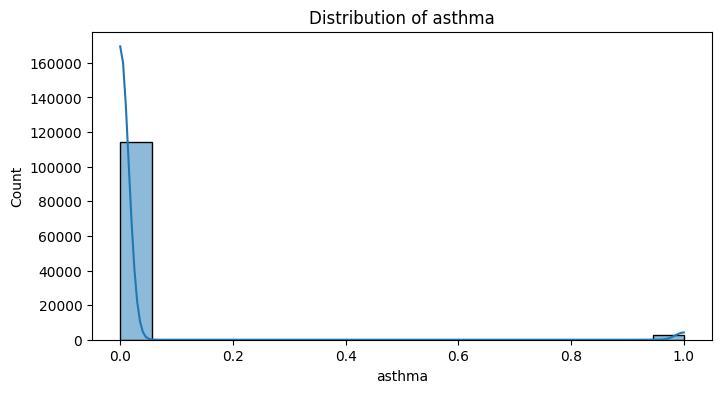

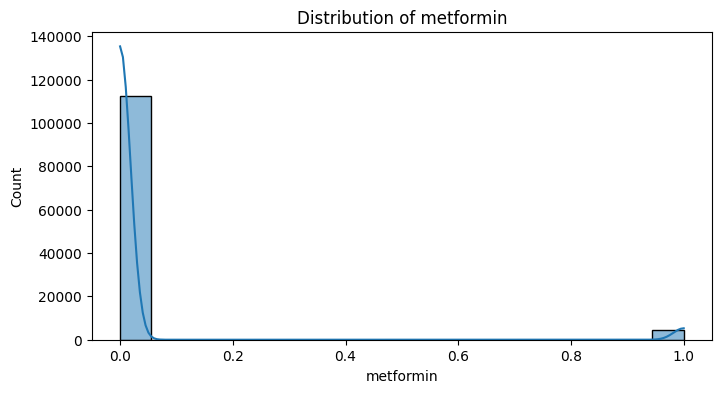

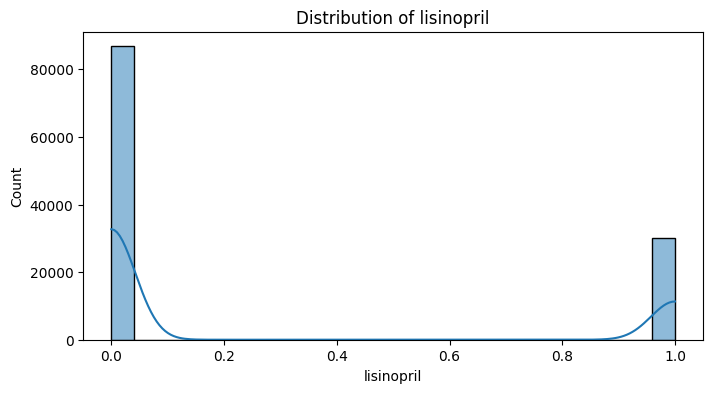

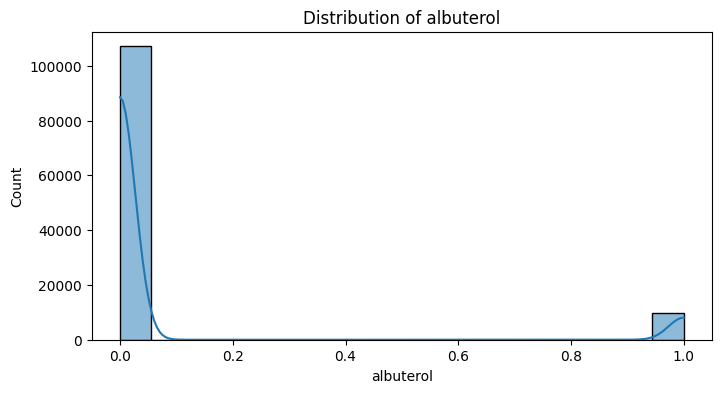

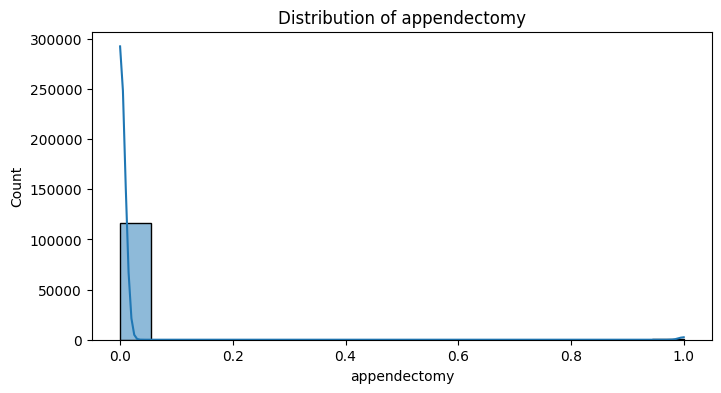

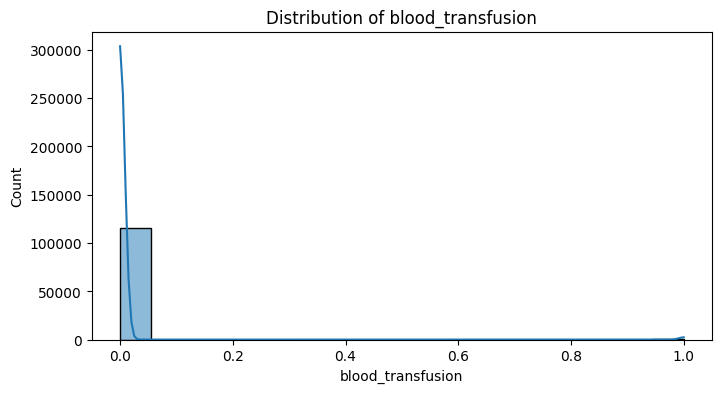

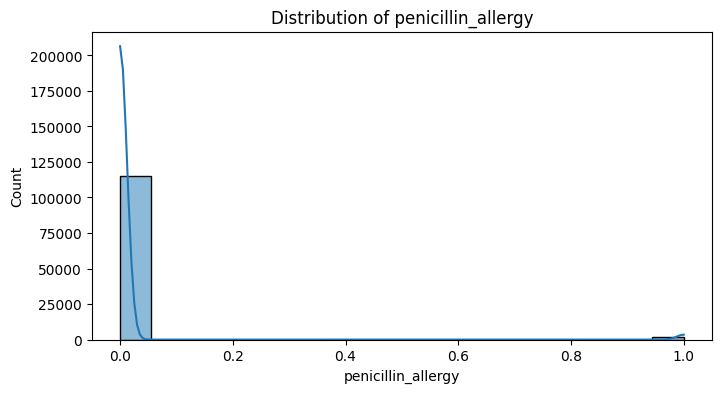

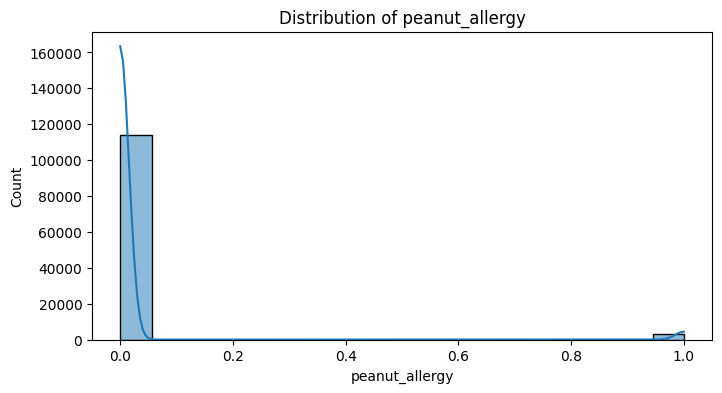

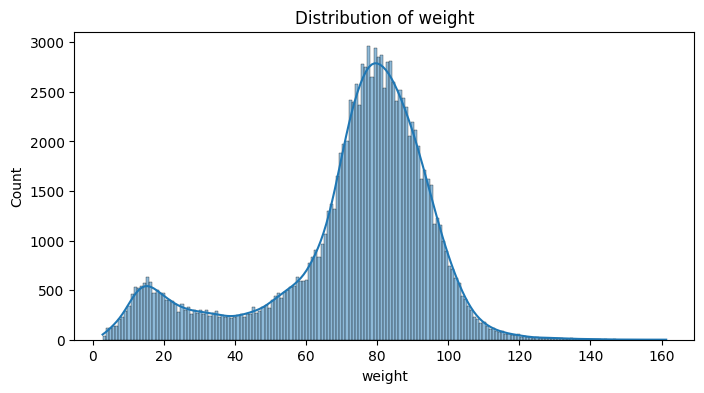

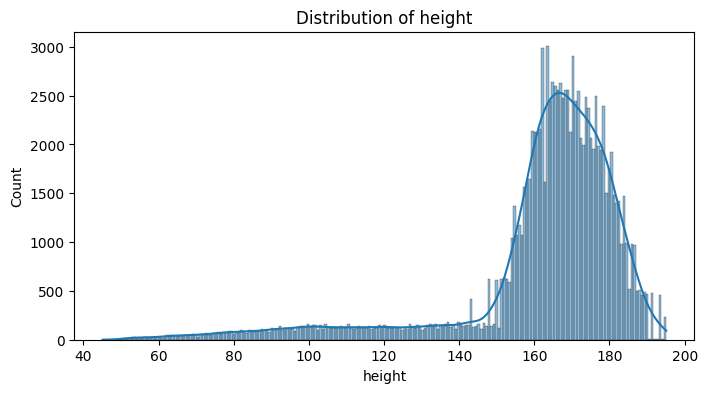

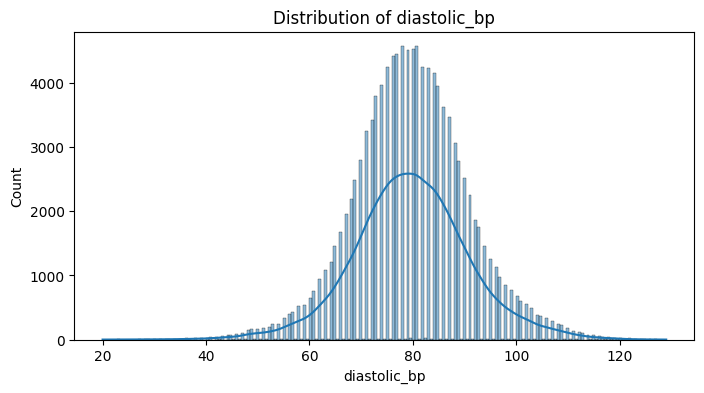

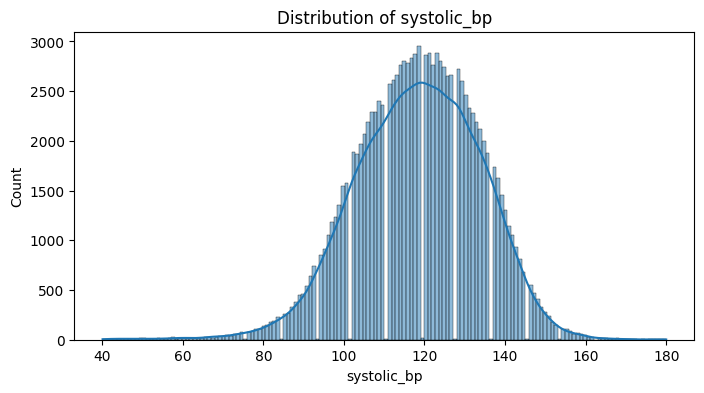

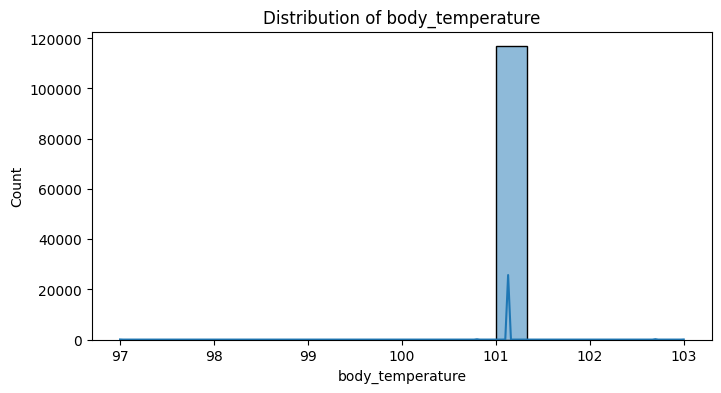

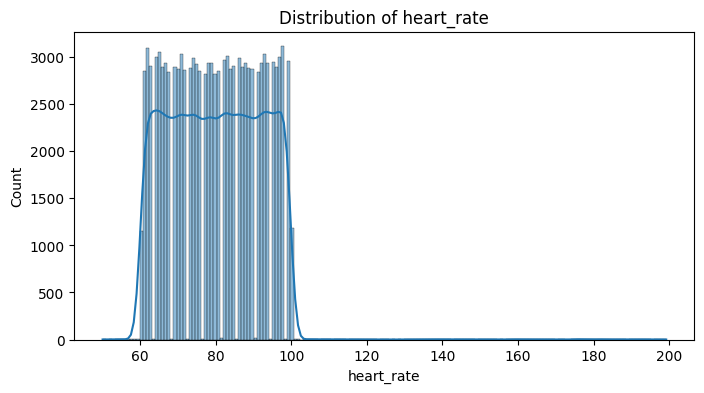

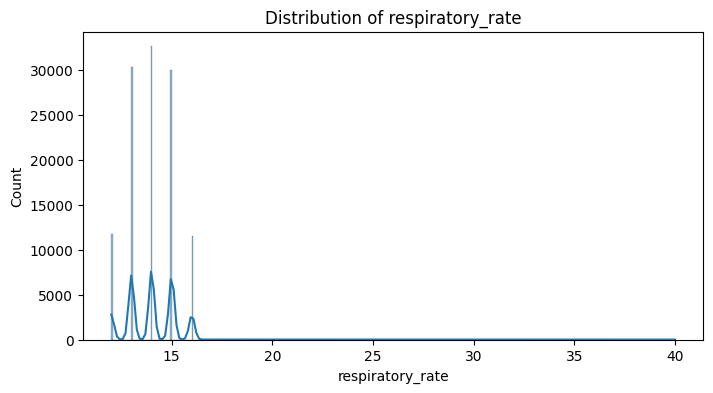

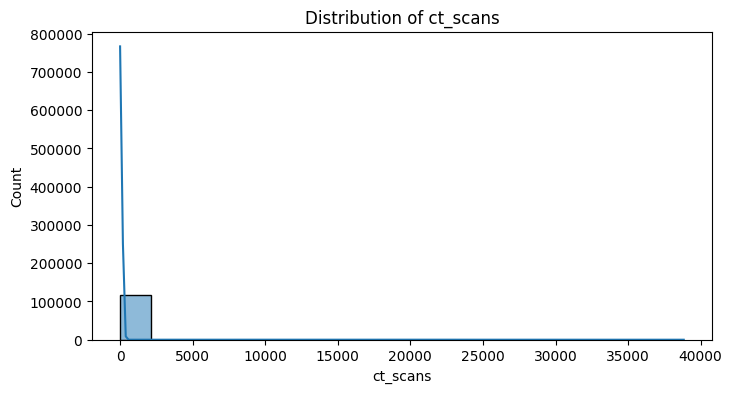

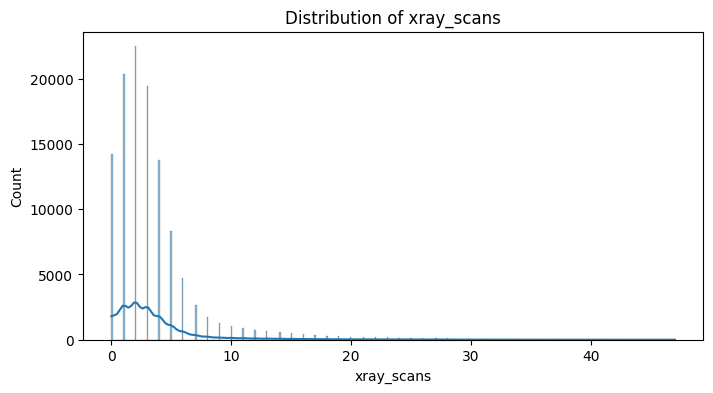

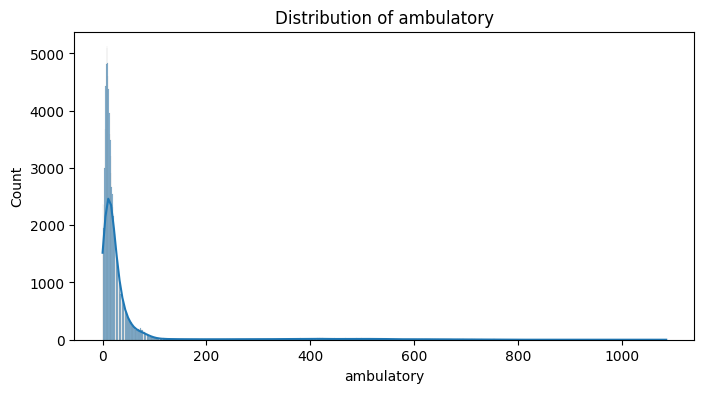

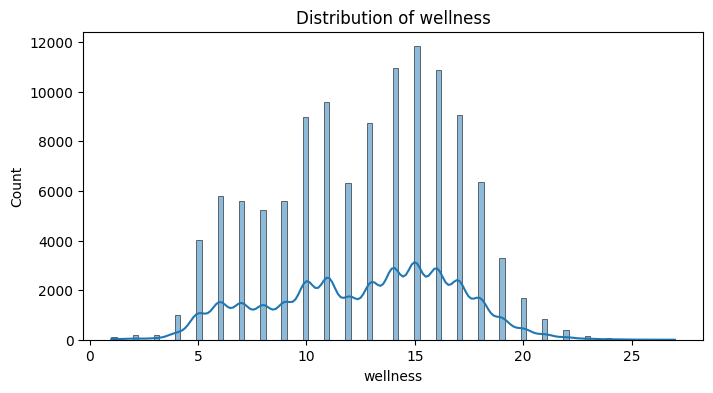

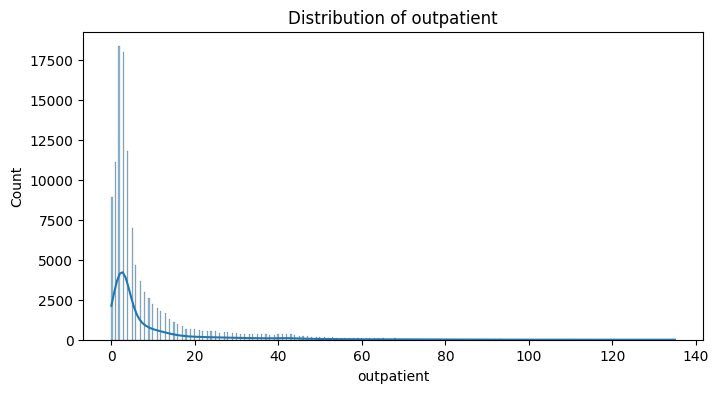

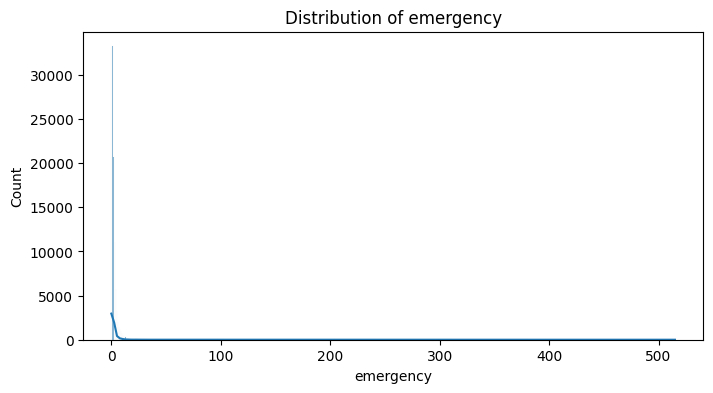

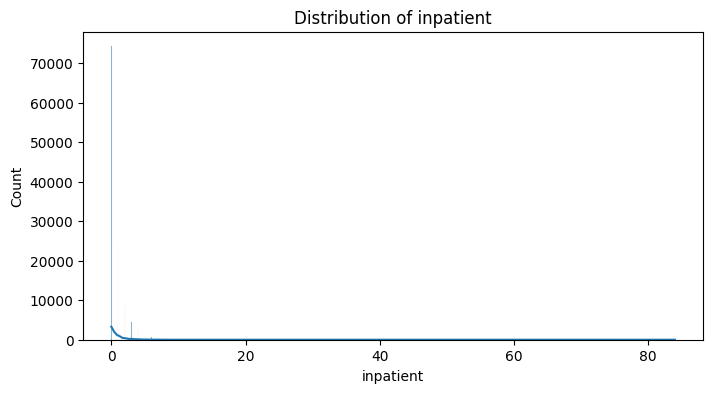

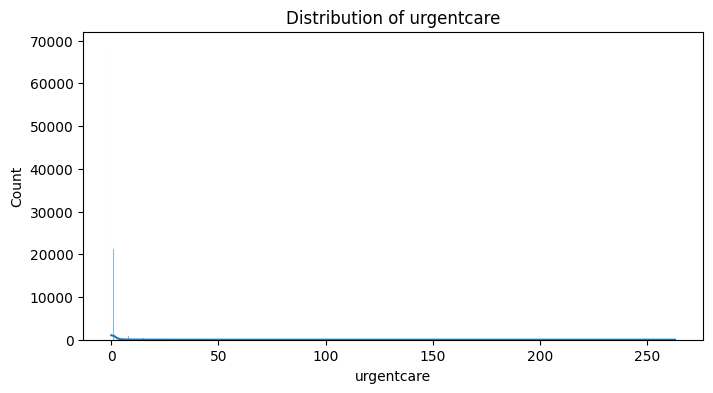

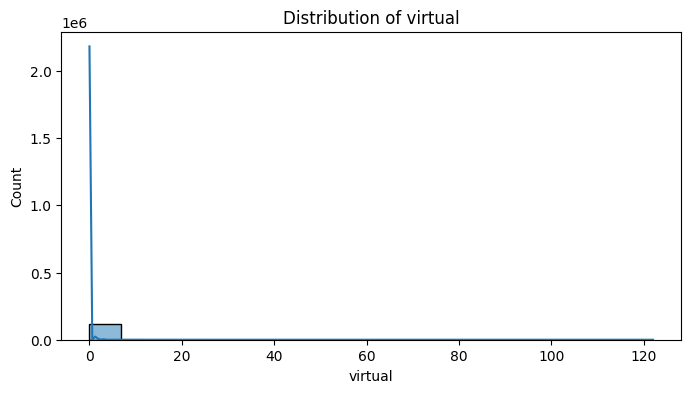

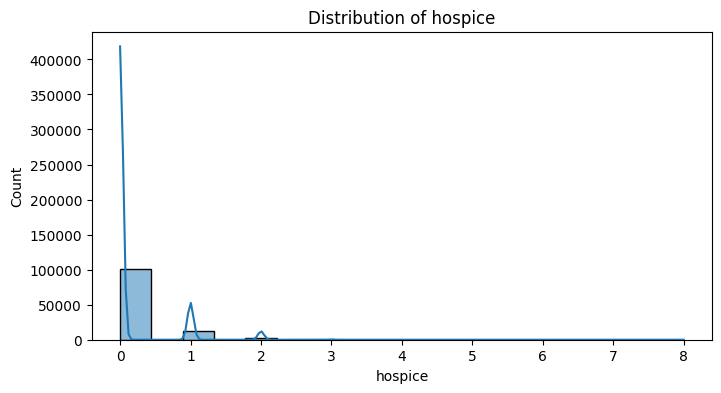

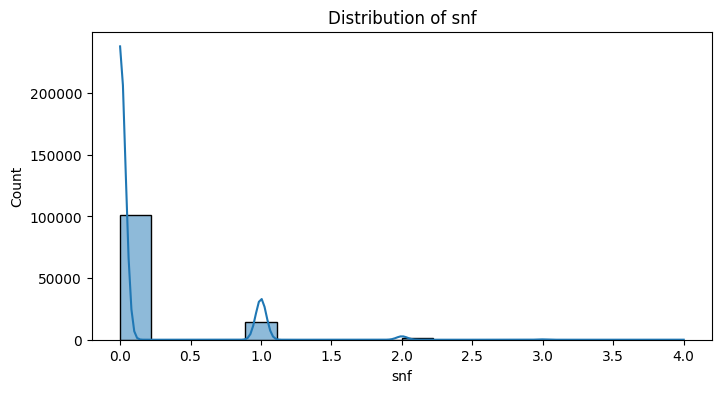

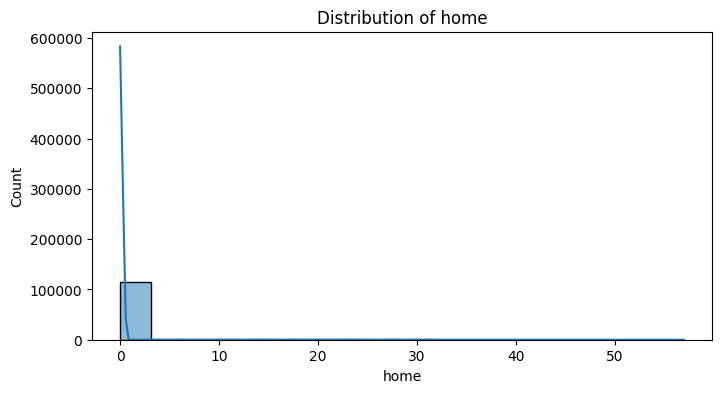

KeyboardInterrupt: 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

# Load the combined data
combined_df = pd.read_csv('combined_data.csv')

# Define structured columns
structured_cols = [
    'Id',  # Assuming 'Id' is the patient identifier
    'AGE', 'DECEASED', 'GENDER', 'RACE', 'ETHNICITY',
    'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME',
    'num_conditions', 'num_medications', 'num_procedures',
    'num_allergies', 'num_imaging_studies', 'num_encounters',
    'diabetes', 'hypertension', 'asthma', 'metformin',
    'lisinopril', 'albuterol', 'appendectomy', 'blood_transfusion',
    'penicillin_allergy', 'peanut_allergy', 'weight', 'height',
    'diastolic_bp', 'systolic_bp', 'body_temperature', 'heart_rate',
    'respiratory_rate', 'ct_scans', 'xray_scans', 'ambulatory',
    'wellness', 'outpatient', 'emergency', 'inpatient', 'urgentcare',
    'virtual', 'hospice', 'snf', 'home'
]

# Extract structured data
structured_data = combined_df[structured_cols]

# Display the first few rows
print("First 5 rows of structured data:")
print(structured_data.head())

# Check for missing values
print("\nMissing values in each column:")
print(structured_data.isnull().sum())

# Get descriptive statistics
print("\nDescriptive statistics:")
print(structured_data.describe(include='all'))

# Identify categorical and numerical columns
numerical_cols = structured_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = structured_data.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Analyze distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(structured_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Analyze categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=structured_data[col])
    plt.title(f'Count plot of {col}')
    plt.show()

# Check correlations between numerical features
plt.figure(figsize=(12, 10))
corr_matrix = structured_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import ast

# Load the combined data
combined_df = pd.read_csv('combined_data.csv')

# Define unstructured columns
unstructured_cols = ['Id', 'Token_IDs', 'Attention_Masks']

# Extract unstructured data
unstructured_data = combined_df[unstructured_cols]

# Display the first few rows
print("First 5 rows of unstructured data:")
print(unstructured_data.head())

# Check for missing values
print("\nMissing values in unstructured data:")
print(unstructured_data.isnull().sum())

# Inspect the data types
print("\nData types of unstructured data columns:")
print(unstructured_data.dtypes)

# Convert string representations to actual lists (if necessary)
def parse_list_column(column):
    parsed_data = []
    for item in column:
        if isinstance(item, str):
            try:
                parsed_item = ast.literal_eval(item)
                parsed_data.append(parsed_item)
            except Exception as e:
                print(f"Error parsing item: {item}\nError: {e}")
                parsed_data.append(np.nan)
        else:
            parsed_data.append(item)
    return parsed_data

# Apply parsing function
unstructured_data['Token_IDs'] = parse_list_column(unstructured_data['Token_IDs'])
unstructured_data['Attention_Masks'] = parse_list_column(unstructured_data['Attention_Masks'])

# Check for any parsing errors
print("\nAny parsing errors (Token_IDs):", unstructured_data['Token_IDs'].isnull().sum())
print("Any parsing errors (Attention_Masks):", unstructured_data['Attention_Masks'].isnull().sum())

# Inspect lengths of Token_IDs and Attention_Masks
unstructured_data['Token_IDs_Length'] = unstructured_data['Token_IDs'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
unstructured_data['Attention_Masks_Length'] = unstructured_data['Attention_Masks'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

print("\nStatistics of Token_IDs lengths:")
print(unstructured_data['Token_IDs_Length'].describe())

print("\nStatistics of Attention_Masks lengths:")
print(unstructured_data['Attention_Masks_Length'].describe())

# Plot distributions of sequence lengths
plt.figure(figsize=(8, 4))
sns.histplot(unstructured_data['Token_IDs_Length'].dropna(), bins=50, kde=True)
plt.title('Distribution of Token_IDs Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Samples')
plt.show()

# Display a few samples
for idx in range(5):
    print(f"\nSample {idx+1}:")
    print("Token_IDs:", unstructured_data['Token_IDs'].iloc[idx])
    print("Attention_Masks:", unstructured_data['Attention_Masks'].iloc[idx])

# Check for consistency between Token_IDs and Attention_Masks
unstructured_data['Length_Match'] = unstructured_data.apply(
    lambda row: len(row['Token_IDs']) == len(row['Attention_Masks']) if pd.notnull(row['Token_IDs']) and pd.notnull(row['Attention_Masks']) else False,
    axis=1
)
print("\nNumber of samples where Token_IDs and Attention_Masks lengths match:", unstructured_data['Length_Match'].sum())
print("Number of samples where lengths do not match:", (~unstructured_data['Length_Match']).sum())

<h1>To understand the data</h1>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the combined data
combined_df = pd.read_csv('combined_data.csv')

# Define structured columns
structured_cols = [
    'Id',  # Assuming 'Id' is the patient identifier
    'AGE', 'DECEASED', 'GENDER', 'RACE', 'ETHNICITY',
    'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME',
    'num_conditions', 'num_medications', 'num_procedures',
    'num_allergies', 'num_imaging_studies', 'num_encounters',
    'diabetes', 'hypertension', 'asthma', 'metformin',
    'lisinopril', 'albuterol', 'appendectomy', 'blood_transfusion',
    'penicillin_allergy', 'peanut_allergy', 'weight', 'height',
    'diastolic_bp', 'systolic_bp', 'body_temperature', 'heart_rate',
    'respiratory_rate', 'ct_scans', 'xray_scans', 'ambulatory',
    'wellness', 'outpatient', 'emergency', 'inpatient', 'urgentcare',
    'virtual', 'hospice', 'snf', 'home'
]

# Extract structured data
structured_data = combined_df[structured_cols]

# Display the first few rows
print("First 5 rows of structured data:")
print(structured_data.head())

# Check for missing values
print("\nMissing values in each column:")
print(structured_data.isnull().sum())

# Get descriptive statistics
print("\nDescriptive statistics (numerical features):")
print(structured_data.describe())

# Identify categorical and numerical columns
numerical_cols = structured_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = structured_data.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)

# Analyze unique values in categorical features
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(structured_data[col].unique())
    print(f"Value counts for '{col}':")
    print(structured_data[col].value_counts())

First 5 rows of structured data:
                                     Id        AGE  DECEASED GENDER   RACE  \
0  e7fccb74-5441-cf7d-77e3-72e0ad240431  10.866530         0      M  white   
1  9ee1c020-c213-d4ff-6a0f-68c25cabfccd  17.100616         0      F  white   
2  5c7c82a3-2560-b590-afd6-05a563cc467a  24.260096         0      M  white   
3  dd5d2d27-99de-a39c-9110-e69e439982c9  40.818617         0      M  white   
4  5dee1b1d-1012-018c-2f44-7eb930a42b76  43.085558         0      F  white   

     ETHNICITY  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  INCOME  \
0  nonhispanic             31923.49               574.02  787269   
1  nonhispanic             47615.89                 0.00   60322   
2  nonhispanic              4559.06             52650.84   16070   
3     hispanic            129600.02             11690.43   77414   
4  nonhispanic            172547.56            100209.98   28406   

   num_conditions  ...  ambulatory  wellness  outpatient  emergency  \
0              15 

In [3]:
# Import necessary libraries
import pandas as pd
import ast
import numpy as np

# Load the combined data
combined_df = pd.read_csv('combined_data.csv')

# Define unstructured columns
unstructured_cols = ['Id', 'Token_IDs', 'Attention_Masks']

# Extract unstructured data
unstructured_data = combined_df[unstructured_cols]

# Display the first few rows
print("First 5 rows of unstructured data:")
print(unstructured_data.head())

# Check for missing values
print("\nMissing values in unstructured data:")
print(unstructured_data.isnull().sum())

# Inspect the data types
print("\nData types of unstructured data columns:")
print(unstructured_data.dtypes)

# Convert string representations to actual lists (if necessary)
def parse_list_column(column):
    parsed_data = []
    for idx, item in enumerate(column):
        if isinstance(item, str):
            try:
                parsed_item = ast.literal_eval(item)
                parsed_data.append(parsed_item)
            except Exception as e:
                print(f"Error parsing item at index {idx}: {item}\nError: {e}")
                parsed_data.append(np.nan)
        else:
            parsed_data.append(item)
    return parsed_data

# Apply parsing function
unstructured_data['Token_IDs'] = parse_list_column(unstructured_data['Token_IDs'])
unstructured_data['Attention_Masks'] = parse_list_column(unstructured_data['Attention_Masks'])

# Check for any parsing errors
print("\nNumber of parsing errors in 'Token_IDs':", unstructured_data['Token_IDs'].isnull().sum())
print("Number of parsing errors in 'Attention_Masks':", unstructured_data['Attention_Masks'].isnull().sum())

# Inspect lengths of Token_IDs and Attention_Masks
unstructured_data['Token_IDs_Length'] = unstructured_data['Token_IDs'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
unstructured_data['Attention_Masks_Length'] = unstructured_data['Attention_Masks'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

print("\nStatistics of 'Token_IDs_Length':")
print(unstructured_data['Token_IDs_Length'].describe())

print("\nStatistics of 'Attention_Masks_Length':")
print(unstructured_data['Attention_Masks_Length'].describe())

# Display a few samples
for idx in range(5):
    print(f"\nSample {idx+1}:")
    print("Token_IDs:", unstructured_data['Token_IDs'].iloc[idx])
    print("Attention_Masks:", unstructured_data['Attention_Masks'].iloc[idx])

# Check for consistency between Token_IDs and Attention_Masks
unstructured_data['Length_Match'] = unstructured_data.apply(
    lambda row: isinstance(row['Token_IDs'], list) and isinstance(row['Attention_Masks'], list) and len(row['Token_IDs']) == len(row['Attention_Masks']),
    axis=1
)
print("\nNumber of samples where 'Token_IDs' and 'Attention_Masks' lengths match:", unstructured_data['Length_Match'].sum())
print("Number of samples where lengths do not match:", (~unstructured_data['Length_Match']).sum())

First 5 rows of unstructured data:
                                     Id  \
0  e7fccb74-5441-cf7d-77e3-72e0ad240431   
1  9ee1c020-c213-d4ff-6a0f-68c25cabfccd   
2  5c7c82a3-2560-b590-afd6-05a563cc467a   
3  dd5d2d27-99de-a39c-9110-e69e439982c9   
4  5dee1b1d-1012-018c-2f44-7eb930a42b76   

                                           Token_IDs  \
0  [101, 16798, 2509, 1011, 2260, 1011, 2385, 100...   
1  [101, 16798, 2549, 1011, 5511, 1011, 2322, 100...   
2  [101, 16798, 2475, 1011, 5641, 1011, 2423, 100...   
3  [101, 16798, 2549, 1011, 5718, 1011, 2756, 100...   
4  [101, 16798, 2549, 1011, 5641, 1011, 2676, 100...   

                                     Attention_Masks  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  

Missing values in unstructured data:
I

/var/folders/k3/gcflkw4j1lx_kn_v5p132mym0000gn/T/ipykernel_15090/520391049.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unstructured_data['Token_IDs'] = parse_list_column(unstructured_data['Token_IDs'])
/var/folders/k3/gcflkw4j1lx_kn_v5p132mym0000gn/T/ipykernel_15090/520391049.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unstructured_data['Attention_Masks'] = parse_list_column(unstructured_data['Attention_Masks'])
/var/folders/k3/gcflkw4j1lx_kn_v5p132mym0000gn/T/ipykernel_15090/520391049.py:


Number of parsing errors in 'Token_IDs': 0
Number of parsing errors in 'Attention_Masks': 0

Statistics of 'Token_IDs_Length':
count    116842.000000
mean        511.035373
std          16.652956
min         102.000000
25%         512.000000
50%         512.000000
75%         512.000000
max         512.000000
Name: Token_IDs_Length, dtype: float64

Statistics of 'Attention_Masks_Length':
count    116842.000000
mean        511.035373
std          16.652956
min         102.000000
25%         512.000000
50%         512.000000
75%         512.000000
max         512.000000
Name: Attention_Masks_Length, dtype: float64

Sample 1:
Token_IDs: [101, 16798, 2509, 1011, 2260, 1011, 2385, 1001, 2708, 12087, 2053, 10821, 1012, 1001, 2381, 1997, 2556, 7355, 12005, 2581, 2575, 2475, 2003, 1037, 2184, 2095, 1011, 2214, 2512, 24158, 26569, 2278, 2317, 3287, 1012, 5776, 2038, 1037, 2381, 1997, 18353, 5856, 10175, 4295, 1006, 8761, 1007, 1010, 11325, 22953, 12680, 13706, 1006, 8761, 1007, 1010, 14667, 33

/var/folders/k3/gcflkw4j1lx_kn_v5p132mym0000gn/T/ipykernel_15090/520391049.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unstructured_data['Length_Match'] = unstructured_data.apply(


In [ ]:
# Merge structured and unstructured data on 'Id'
merged_data = pd.merge(structured_data, unstructured_data, on='Id', how='inner')

print("\nNumber of samples after merging:", merged_data.shape[0])

# Check for any missing values in merged data
print("\nMissing values in merged data:")
print(merged_data.isnull().sum())

# Analyze whether any patients are missing either structured or unstructured data
total_patients = combined_df['Id'].nunique()
structured_patients = structured_data['Id'].nunique()
unstructured_patients = unstructured_data['Id'].nunique()
merged_patients = merged_data['Id'].nunique()

print(f"\nTotal number of patients: {total_patients}")
print(f"Number of patients with structured data: {structured_patients}")
print(f"Number of patients with unstructured data: {unstructured_patients}")
print(f"Number of patients with both structured and unstructured data: {merged_patients}")

missing_structured = total_patients - structured_patients
missing_unstructured = total_patients - unstructured_patients

print(f"\nNumber of patients missing structured data: {missing_structured}")
print(f"Number of patients missing unstructured data: {missing_unstructured}")